## Home assignment

1.	Make two groups of objects on your dataset.
2.	Compute histograms of a variable on these groups and show them, and make a comment.
3.	Compute 95% confidence intervals of the within-group means using bootstrap.
4.	Compute 95% confidence interval of the difference of the means using bootstrap.
5. Comment on the results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats
%matplotlib inline 

#### Load data

In [3]:
bg_3 = pd.read_csv('chr2R_data/BG3_cell_line.csv',sep=';',header=False)
s_2 = pd.read_csv('chr2R_data/S2_cell_line.csv',sep=';',header=False)
kc = pd.read_csv('chr2R_data/KC_cell_line.csv',sep=';',header=False)

In [4]:
bg_3.head()

,Chr,Bin,1,2,3,4,5,6,7,8,9,RNAseq_Rep1,RNAseq_Rep2,TAD,Dist. to TAD border
0,chr2R,0,0.08565,0,0,0,0,0,0.35000,0,0,153,182,0,0
1,chr2R,20000,0.01435,0,0,0,0,0,0.98565,0,0,105,137,1,1
2,chr2R,40000,0.00000,0,0,0,0,0,1.00000,0,0,0,0,1,2
3,chr2R,60000,0.07000,0,0,0,0,0,0.93000,0,0,330,328,1,1
4,chr2R,80000,0.00000,0,0,0,0,0,1.00000,0,0,0,0,0,0


#### Divide into two groups (feature: ch1)

In [6]:
bg_3_ch_1 = bg_3['1']
s_2_ch_1 = s_2['1']

In [7]:
bg_and_s = bg_3_ch_1.append(s_2_ch_1)

#### Histograms 

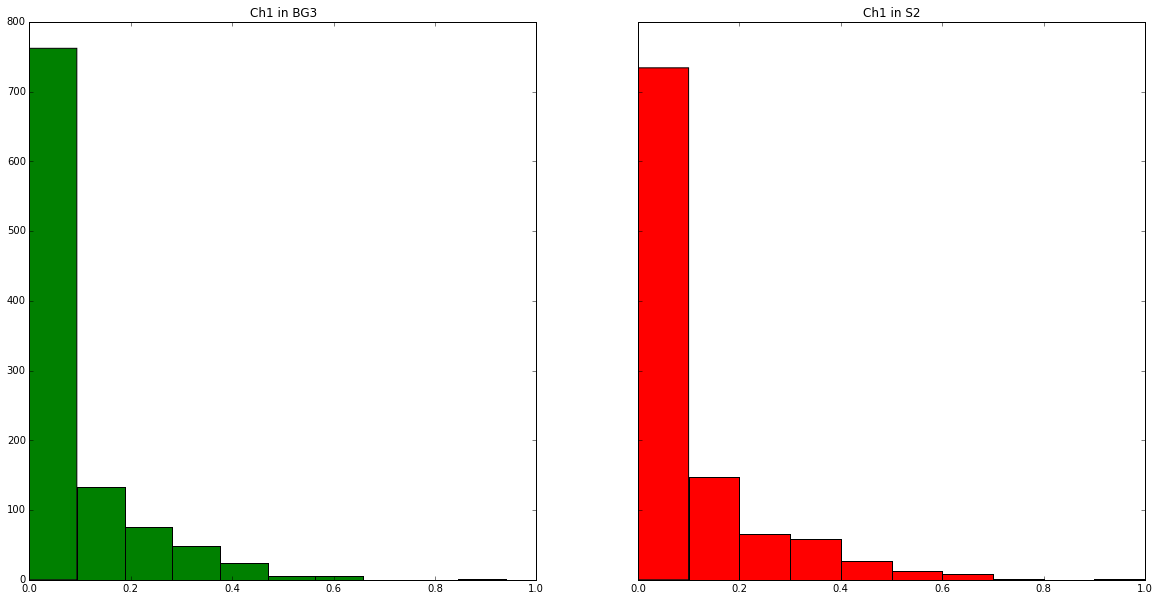

In [8]:
fig, hist = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(20,10))

hist[0].hist(bg_3_ch_1.values,color = 'green')
hist[0].set_title('Ch1 in BG3')

hist[1].hist(s_2_ch_1.values,color = 'red')
hist[1].set_title('Ch1 in S2')

#### Bootstrap
It is interesting to read: https://habrahabr.ru/post/192000/

In [9]:
def bootstrap(data):
    n = len(data.values)-1
    matrix = np.ceil(n*np.random.rand(n,5000))
    mean = []
    std = []
    
    for i,row in enumerate(matrix):
        for j,item in enumerate(row):
            matrix[i,j] = float(data.iloc[int(item)])
    for column in matrix.T:
        mean.append(np.mean(column))
        std.append(np.std(column))
        
    return mean,np.mean(mean),np.mean(std)/np.sqrt(len(column))

In [10]:
bg_mean_dist, bg_ex, bg_sx = bootstrap(bg_3_ch_1)
s_mean_dist, s_ex, s_sx = bootstrap(s_2_ch_1)

# z = x - y
m_ex = s_ex - bg_ex 
m_sx = np.sqrt(bg_sx**2 + bg_sx**2)

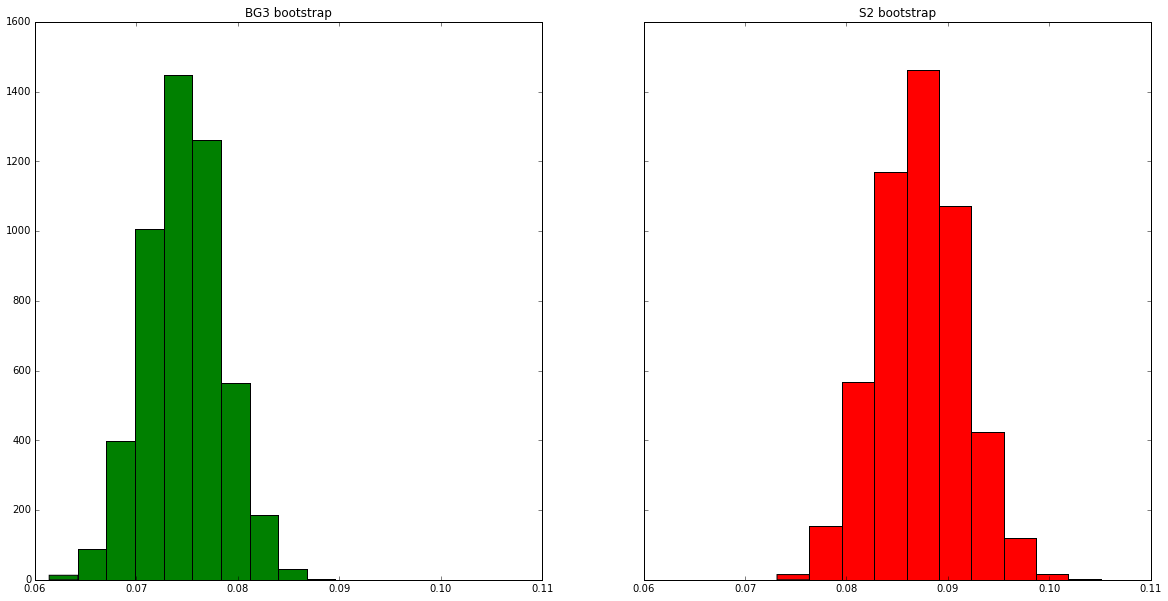

In [11]:
fig, hist = plt.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(20,10))

hist[0].hist(bg_mean_dist,color = 'green')
hist[0].set_title('BG3 bootstrap')

hist[1].hist(s_mean_dist,color = 'red')
hist[1].set_title('S2 bootstrap')

#### 95% confidence interval 

In [12]:
def get_confidence_interval(ex, sx, alpha = 0.05):
    z = abs(stats.norm.ppf(alpha/2))
    return [ex-z*sx,ex+z*sx]

In [16]:
print('Confidence intervals\nBG3:', get_confidence_interval(bg_ex, bg_sx),
                          '\nS2:', get_confidence_interval(s_ex, s_sx),
                          '\n(S2 - BG3):', get_confidence_interval(m_ex, m_sx))

Confidence intervals
BG3: [0.067430216748981864, 0.081888951906321172] 
S2: [0.078918142059946517, 0.095539277352932273] 
(S2 - BG3): [0.0023452557016529138, 0.022792995055922839]


### Description

The cell is for future comment of the results